In [49]:
import os
import matplotlib.pyplot as plt
import gensim
from gensim import models
from gensim.models.doc2vec import Doc2Vec

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# import tensorflow as tf

import numpy as np
import pandas as pd
import nltk

from keras.models import Sequential
from keras.layers import LSTM,Dense, Dropout, BatchNormalization

from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

np.random.seed(2018)

In [50]:
notebook_dir = os.getcwd()
rel_path = '../../data/complete_data/minutes_cleaned_spy_tnx.csv'

df=pd.read_csv(os.path.join(notebook_dir, rel_path), parse_dates=['date'])

In [51]:
df['contents'] = df['contents'].apply(lambda x: x.replace('\n\n[SECTION]\n\n', '').replace('\n', ' ').replace('\r', ' ').strip())
df

# Preprocessing

In [52]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/phzeller/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [53]:
stemmer = SnowballStemmer('english')

In [54]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [55]:
processed_docs = df['contents'].map(preprocess)

In [56]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 abat
1 abil
2 abroad
3 abrupt
4 absenc
5 acceler
6 accept
7 accommod
8 accompani
9 accord
10 account


In [57]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [58]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [59]:
# bow_doc_43 = bow_corpus[43]

# for i in range(len(bow_doc_43)):
#     print("Word {} (\"{}\") appears {} time.".format(bow_doc_43[i][0], 
#                                                      dictionary[bow_doc_43[i][0]], 
#                                                      bow_doc_43[i][1]))

In [60]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

# LDA using bag of words

In [61]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [62]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.028*"shall" + 0.017*"arrang" + 0.013*"subcommitte" + 0.010*"consult" + 0.010*"paragraph" + 0.009*"draw" + 0.007*"procedur" + 0.006*"select" + 0.006*"sell" + 0.006*"million"
Topic: 1 
Words: 0.010*"hurrican" + 0.009*"desk" + 0.008*"reinvest" + 0.007*"mandat" + 0.006*"disrupt" + 0.005*"soma" + 0.005*"tool" + 0.005*"arrang" + 0.004*"district" + 0.004*"outbreak"
Topic: 2 
Words: 0.012*"april" + 0.008*"arrang" + 0.006*"greenspan" + 0.006*"lindsey" + 0.005*"lesser" + 0.005*"broaddus" + 0.005*"mexico" + 0.005*"mcdonough" + 0.005*"kelley" + 0.005*"discount"
Topic: 3 
Words: 0.011*"desk" + 0.010*"april" + 0.009*"reinvest" + 0.007*"district" + 0.006*"primari" + 0.006*"overnight" + 0.005*"michael" + 0.005*"david" + 0.005*"transitori" + 0.005*"strategi"
Topic: 4 
Words: 0.007*"april" + 0.007*"softwar" + 0.006*"tech" + 0.005*"deterior" + 0.004*"guidanc" + 0.004*"loss" + 0.004*"governorsmessr" + 0.004*"soften" + 0.004*"strain" + 0.003*"bernank"
Topic: 5 
Words: 0.010*"arrang" + 0.

# LDA using TF-IDF

In [63]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [64]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.015*"pandem" + 0.005*"virus" + 0.004*"repo" + 0.004*"april" + 0.004*"covid" + 0.004*"desk" + 0.004*"chair" + 0.004*"guidanc" + 0.003*"shall" + 0.003*"select"
Topic: 1 Word: 0.003*"bias" + 0.003*"hurrican" + 0.002*"strike" + 0.002*"scatter" + 0.002*"press" + 0.002*"tech" + 0.002*"summer" + 0.002*"confer" + 0.002*"softwar" + 0.002*"background"
Topic: 2 Word: 0.004*"april" + 0.003*"forese" + 0.003*"press" + 0.002*"ferguson" + 0.002*"kelley" + 0.002*"absent" + 0.002*"shall" + 0.002*"sentenc" + 0.002*"mcdonough" + 0.002*"gramlich"
Topic: 3 Word: 0.004*"disinfl" + 0.003*"stewart" + 0.003*"shall" + 0.002*"predomin" + 0.002*"studi" + 0.002*"minor" + 0.002*"forese" + 0.002*"perman" + 0.002*"arrang" + 0.002*"regim"
Topic: 4 Word: 0.009*"hurrican" + 0.004*"forese" + 0.003*"tech" + 0.003*"santomero" + 0.003*"olson" + 0.003*"stringent" + 0.002*"gramlich" + 0.002*"bie" + 0.002*"threshold" + 0.002*"ferguson"
Topic: 5 Word: 0.004*"april" + 0.003*"lawar" + 0.003*"legisl" + 0.003*"strai

# Doc2vec

In [65]:
def read_corpus(f, tokens_only=False):
        for i, line in enumerate(f):
            tokens = gensim.utils.simple_preprocess(line)
            if tokens_only:
                yield tokens
            else:
                # For training data, add tags
                yield gensim.models.doc2vec.TaggedDocument(tokens, [i])

train_corpus = list(read_corpus(df.contents))

In [66]:

model = Doc2Vec(train_corpus, vector_size=200, window=3, min_count=1, workers=4)

In [67]:
def getVecs(model_name, corpus, size):
    vecs = [np.array(model_name[z.tags[0]]).reshape((1, size)) for z in corpus]
    return np.concatenate(vecs)
train_vecs_dm = getVecs(model, train_corpus, 200)

# Predictions on SPY changes


In [68]:
def pct_change_from_day_0(announcement):
    pct_change= (announcement['SPY: d+7']/announcement['SPY: d-1'])-1
    if pct_change>0:
        return 'up'
    else:
        return 'down'

In [69]:
pct_change_from_day_0(df.iloc[141])

'up'

In [70]:
df['+7change']=df.apply(pct_change_from_day_0,axis=1)

In [71]:
labels=df['+7change'].to_numpy()
labels_onehot=pd.get_dummies(labels).values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(train_vecs_dm,labels_onehot,train_size=0.9)
print (len(X_train),len(X_test),len(y_train),len(y_test))

216 24 216 24


In [73]:
X_train_m, X_val, y_train_m, y_val = train_test_split(X_train,y_train,train_size=0.9)
print (len(X_train_m),len(X_val),len(y_train_m),len(y_val))

194 22 194 22


In [74]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())


model.add(LSTM(units = 50))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

history=model.fit(X_train_m, y_train_m,validation_data=(X_val,y_val), epochs = 30, batch_size = 100)

Epoch 1/30


2022-03-14 18:50:14.907040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:15.214970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:15.485117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:15.810941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:16.377743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.4536

2022-03-14 18:50:19.177770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:19.277257: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-14 18:50:19.534446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 6s 3s/step - loss: 0.3107 - accuracy: 0.4536 - val_loss: 0.2488 - val_accuracy: 0.6364
Epoch 2/30
2/2 [==============================] - 0s 165ms/step - loss: 0.2947 - accuracy: 0.5000 - val_loss: 0.2488 - val_accuracy: 0.5455
Epoch 3/30
2/2 [==============================] - 0s 155ms/step - loss: 0.2689 - accuracy: 0.5515 - val_loss: 0.2487 - val_accuracy: 0.4545
Epoch 4/30
2/2 [==============================] - 0s 157ms/step - loss: 0.2637 - accuracy: 0.6134 - val_loss: 0.2485 - val_accuracy: 0.4545
Epoch 5/30
2/2 [==============================] - 0s 157ms/step - loss: 0.2555 - accuracy: 0.5928 - val_loss: 0.2480 - val_accuracy: 0.5000
Epoch 6/30
2/2 [==============================] - 0s 156ms/step - loss: 0.2636 - accuracy: 0.5876 - val_loss: 0.2475 - val_accuracy: 0.5909
Epoch 7/30
2/2 [==============================] - 0s 157ms/step - loss: 0.2568 - accuracy: 0.5876 - val_loss: 0.2470 - val_accuracy: 0.6364
Epoch 8/30
2/2 [==================

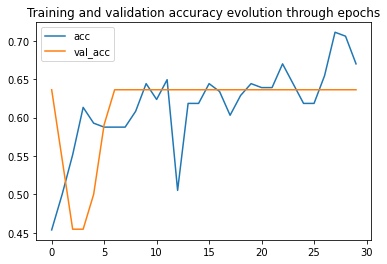

<Figure size 432x288 with 0 Axes>

In [75]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Training and validation accuracy evolution through epochs')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

In [76]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 1s 124ms/step - loss: 0.2399 - accuracy: 0.6111


[0.23992414772510529, 0.6111111044883728]

In [77]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 0.2437 - accuracy: 0.5833


[0.24366728961467743, 0.5833333730697632]